https://theaiquant.medium.com/mastering-the-black-scholes-model-with-python-a-comprehensive-guide-to-option-pricing-11af712697b7

In [1]:
import yfinance as yf
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import plotly.graph_objects as go
from datetime import datetime

In [2]:
start=pd.to_datetime('2010-01-01', format='%Y-%m-%d')
today_date = datetime.today().strftime('%Y-%m-%d')

In [3]:
# Download futures data
symbols = ['JPM']
jpm_stock_data = yf.download(symbols, start, today_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
jpm_stock_data 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,41.790001,42.990002,41.669998,42.849998,29.335232,35460500
2010-01-05,42.790001,43.840000,42.779999,43.680000,29.903460,41208300
2010-01-06,43.450001,44.090000,43.310001,43.919998,30.067757,27729000
2010-01-07,43.790001,45.119999,43.610001,44.790001,30.663364,44864700
2010-01-08,44.369999,44.700001,44.080002,44.680000,30.588060,33110100
...,...,...,...,...,...,...
2024-08-05,194.050003,196.169998,190.899994,194.899994,194.899994,13927000
2024-08-06,195.399994,202.600006,194.000000,200.339996,200.339996,10605800
2024-08-07,203.509995,205.750000,200.199997,200.399994,200.399994,9204400


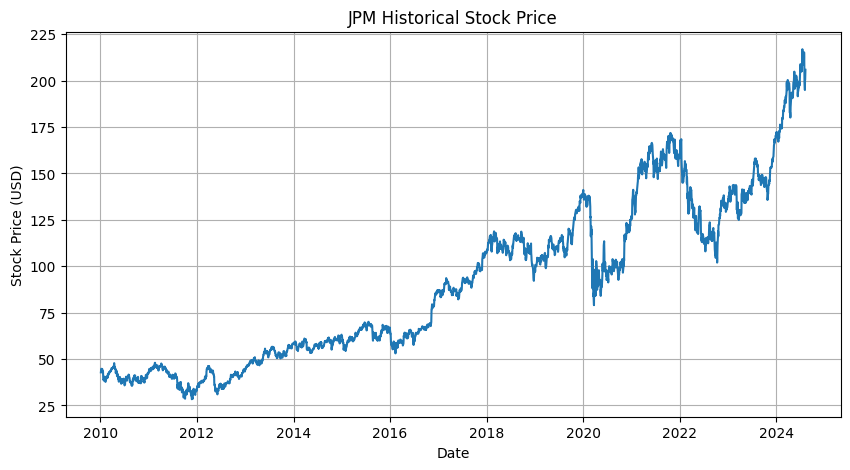

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(jpm_stock_data['Close'])
plt.title('JPM Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)

In [6]:
def fetch_options_data(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    options_dates = ticker.options
    # We'll use the nearest expiry date for our analysis
    options_data = ticker.option_chain(options_dates[0])
    return options_data.calls, options_data.puts

In [7]:
# Example usage:
calls, puts = fetch_options_data('JPM')

In [8]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,JPM240816C00090000,2024-07-19 14:23:10+00:00,90.0,122.11,0.00,0.00,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD
1,JPM240816C00095000,2024-05-17 14:34:42+00:00,95.0,109.80,98.65,99.55,0.0,0.0,10.0,0,0.000010,True,REGULAR,USD
2,JPM240816C00100000,2024-07-03 14:41:01+00:00,100.0,108.31,97.00,100.60,0.0,0.0,3.0,0,0.000010,True,REGULAR,USD
3,JPM240816C00120000,2024-04-05 17:02:55+00:00,120.0,79.56,69.35,72.15,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD
4,JPM240816C00125000,2024-02-26 19:24:24+00:00,125.0,59.96,73.25,76.65,0.0,0.0,2.0,1,0.000010,True,REGULAR,USD
5,JPM240816C00130000,2024-07-11 13:57:34+00:00,130.0,76.58,75.75,76.25,0.0,0.0,2.0,1,1.832032,True,REGULAR,USD
6,JPM240816C00135000,2024-07-03 15:59:31+00:00,135.0,73.05,62.00,65.75,0.0,0.0,10.0,0,0.000010,True,REGULAR,USD
7,JPM240816C00140000,2024-08-05 17:44:36+00:00,140.0,56.29,0.00,0.00,0.0,0.0,6.0,5,0.000010,True,REGULAR,USD
8,JPM240816C00145000,2024-06-21 15:52:19+00:00,145.0,49.90,63.45,67.50,0.0,0.0,5.0,5,2.925540,True,REGULAR,USD
9,JPM240816C00150000,2024-08-09 18:21:39+00:00,150.0,55.78,0.00,0.00,0.0,0.0,3.0,6,0.000010,True,REGULAR,USD


In [9]:
class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma):
        self.S = S        # Underlying asset price
        self.K = K        # Option strike price
        self.T = T        # Time to expiration in years
        self.r = r        # Risk-free interest rate
        self.sigma = sigma  # Volatility of the underlying asset

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def call_option_price(self):
        return (self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0))


In [10]:
# Example usage:
bsm = BlackScholesModel(S=100, K=100, T=1, r=0.05, sigma=0.2)
print(f"Call Option Price: {bsm.call_option_price()}")
print(f"Put Option Price: {bsm.put_option_price()}")

Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971


In [11]:
def calculate_historical_volatility(stock_data, window=252):
    log_returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    volatility = np.sqrt(window) * log_returns.std()
    return volatility

In [12]:
jpm_volatility = calculate_historical_volatility(jpm_stock_data)
print(f"JPM Historical Volatility: {jpm_volatility}")

JPM Historical Volatility: 0.27779735742817674


In [13]:
class BlackScholesGreeks(BlackScholesModel):
    def delta_call(self):
        return si.norm.cdf(self.d1(), 0.0, 1.0)

    def delta_put(self):
        return -si.norm.cdf(-self.d1(), 0.0, 1.0)
    
    def gamma(self):
        return si.norm.pdf(self.d1(), 0.0, 1.0) / (self.S * self.sigma * np.sqrt(self.T))

    def theta_call(self):
        return (-self.S * si.norm.pdf(self.d1(), 0.0, 1.0) * self.sigma / (2 * np.sqrt(self.T)) - self.r * self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def theta_put(self):
        return (-self.S * si.norm.pdf(self.d1(), 0.0, 1.0) * self.sigma / (2 * np.sqrt(self.T)) + self.r * self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0))

    def vega(self):
        return self.S * si.norm.pdf(self.d1(), 0.0, 1.0) * np.sqrt(self.T)
    
    def rho_call(self):
        return self.K * self.T * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0)
    
    def rho_put(self):
        return -self.K * self.T * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0)


In [14]:
# Example usage:
bsg = BlackScholesGreeks(S=100, K=100, T=1, r=0.05, sigma=0.2)
print(f"Call Delta: {bsg.delta_call()}")
print(f"Put Delta: {bsg.delta_put()}")

Call Delta: 0.6368306511756191
Put Delta: -0.3631693488243809


/var/folders/9f/g6tpsc8n5qb861y9f7rpwlcm0000gn/T/ipykernel_67253/3495680239.py:10: RuntimeWarning: divide by zero encountered in log
  return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))


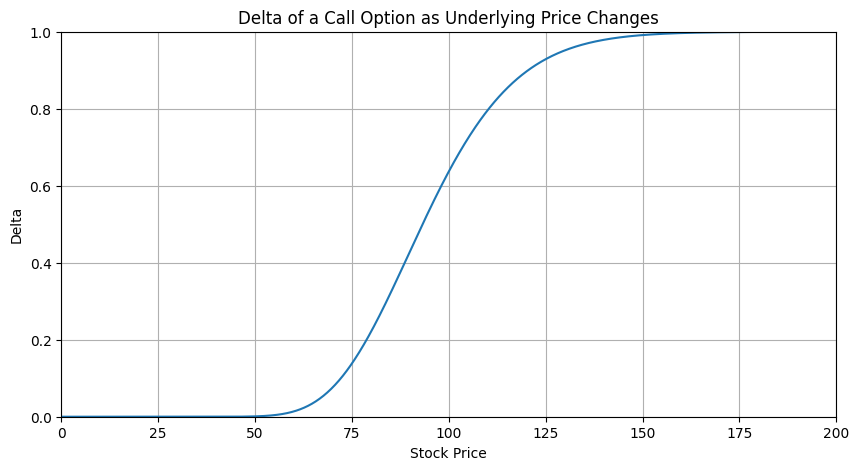

In [15]:
# Define a range of stock prices
stock_prices = np.linspace(0, 200, 1000)
deltas = [BlackScholesGreeks(S=price, K=100, T=1, r=0.05, sigma=0.2).delta_call() for price in stock_prices]

plt.figure(figsize=(10, 5))
plt.plot(stock_prices, deltas)
plt.title('Delta of a Call Option as Underlying Price Changes')
plt.xlabel('Stock Price')
plt.ylabel('Delta')

ax = plt.gca()
ax.set_xlim([0, 200]) 
ax.set_ylim([0, 1])

plt.grid(True)

In [16]:
def plot_option_sensitivity(bs_model, parameter, values, option_type='call'):
    prices = []
    for value in values:
        setattr(bs_model, parameter, value)
        if option_type == 'call':
            prices.append(bs_model.call_option_price())
        else:
            prices.append(bs_model.put_option_price())

    plt.figure(figsize=(10, 5))
    plt.plot(values, prices)
    plt.title(f'Option Price Sensitivity to {parameter.capitalize()}')
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Option Price')
    plt.grid(True)

/var/folders/9f/g6tpsc8n5qb861y9f7rpwlcm0000gn/T/ipykernel_67253/3495680239.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))


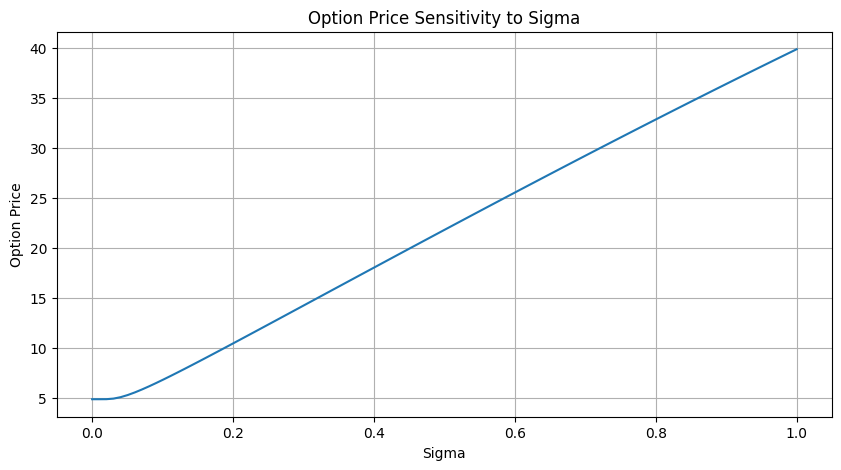

In [17]:
# Example usage:
volatilities = np.linspace(0, 1.0, 100)
plot_option_sensitivity(bsm, 'sigma', volatilities, 'call')